## Questions to Answer
- what is the most frequent internet activity time of the day ?
- how often the ip changes ?
- how often the device changed.
- Does different users use the same device?

## Import Libraries

In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Load CSV

In [148]:
internet = pd.read_csv('internet_session.csv')
internet.head(10)

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
0,user1,2022-05-10 02:59:32,00:00:36:28,10.55.14.222,48:E7:DA:58:22:E9,15861.76,333168.64,349030.40,Idle-Timeout
1,user1,2022-05-10 18:53:27,00:01:49:56,10.55.2.253,48:E7:DA:58:22:E9,16957.44,212152.32,229109.76,Idle-Timeout
2,user1,2022-05-10 21:20:44,00:01:35:00,10.55.2.253,48:E7:DA:58:22:E9,14080.0,195153.92,209233.92,Idle-Timeout
3,user1,2022-05-11 00:37:42,00:00:26:00,10.55.2.253,48:E7:DA:58:22:E9,5242.88,40806.4,46049.28,Idle-Timeout
4,user1,2022-05-11 02:59:38,00:00:11:52,10.55.2.253,48:E7:DA:58:22:E9,22067.2,10772.48,32839.68,Idle-Timeout
5,user1,2022-05-11 17:17:21,00:02:44:29,10.55.2.253,48:E7:DA:58:22:E9,39905.28,676167.68,716083.20,Idle-Timeout
6,user1,2022-05-11 21:27:01,00:00:51:03,10.55.2.253,48:E7:DA:58:22:E9,9472.0,166584.32,176056.32,Idle-Timeout
7,user1,2022-05-11 23:10:21,00:00:20:35,10.55.2.253,48:E7:DA:58:22:E9,11960.32,170977.28,182947.84,Idle-Timeout
8,user1,2022-05-12 00:04:25,00:00:03:12,10.55.2.253,48:E7:DA:58:22:E9,1146.88,3532.8,4679.68,Idle-Timeout
9,user1,2022-05-12 12:48:13,00:00:45:24,10.55.7.61,48:E7:DA:58:22:E9,12974.08,130764.8,143738.88,Idle-Timeout


## Exploration

In [149]:
## Check for null values
nan_values = internet[internet.isna().any(axis=1)]
nan_values

,name,start_time,usage_time,IP,MAC,upload,download,total_transfer,seession_break_reason
673,user1,2022-11-05 18:41:14,00:02:57:27,10.55.2.241,48:E7:DA:58:22:E9,303216.64,148879.36,452096.00,NaN
1130,user2,2022-11-05 18:22:31,00:04:11:28,10.55.14.3,CA:48:87:B2:A5:12,28149.76,547061.76,575201.28,NaN
1649,user3,2022-11-05 18:28:39,00:04:07:29,10.55.15.20,C8:3D:DC:CF:16:C6,33454.08,595537.92,628992.00,NaN
2375,user4,2022-11-05 19:23:52,00:03:05:48,10.55.13.199,D8:9C:67:BA:DC:B9,11171.84,19466.24,30638.08,NaN
2376,user4,2022-11-05 21:50:03,00:00:39:38,10.55.11.248,92:02:4F:EE:EB:3F,4966.4,88340.48,93296.64,NaN
2712,user5,2022-11-05 19:43:29,00:02:15:54,10.55.15.44,C2:BB:83:2B:FF:5A,14325.76,205967.36,220303.36,NaN
3913,user7,2022-11-05 19:38:07,00:02:30:43,10.55.0.215,F8:89:D2:D4:AE:8B,40919.04,1205862.4,1247805.44,NaN
3914,user7,2022-11-05 21:54:24,00:00:14:26,10.55.12.31,C6:2C:1D:5E:86:70,1007.5,8529.92,9543.68,NaN
4711,user9,2022-11-05 20:55:37,00:01:06:20,10.55.2.33,DA:2F:97:0E:B7:D0,21237.76,298536.96,319774.72,NaN


In [150]:
## Replace null values with 'other'
internet.fillna('Other', inplace=True)
internet.groupby('seession_break_reason').size()

seession_break_reason
Idle-Timeout    4350
Lost-Carrier     162
Lost-Service     124
NAS-Reboot         2
Other              9
User-Request      65
dtype: int64

In [151]:
## View different reasons
print(internet.seession_break_reason.nunique())
internet.seession_break_reason.unique()

6


array(['Idle-Timeout', 'Lost-Service', 'Lost-Carrier', 'User-Request',
       'Other', 'NAS-Reboot'], dtype=object)

In [152]:
## View how many users there are
print(internet.name.nunique())
internet.name.unique()

9


array(['user1', 'user2', 'user3', 'user4', 'user5', 'user6', 'user7',
       'user8', 'user9'], dtype=object)

In [153]:
## View the timespan of the data
print(internet.start_time.min())
print(internet.start_time.max())

2022-05-09 22:52:41
2022-11-05 21:54:24


In [154]:
## Check data types
internet.dtypes

name                      object
start_time                object
usage_time                object
IP                        object
MAC                       object
upload                    object
download                  object
total_transfer           float64
seession_break_reason     object
dtype: object

## Analysis

### Question 1

In [155]:
## Convert start time column to datetime
internet['start_time'] = pd.to_datetime(internet['start_time'])
internet.dtypes

name                             object
start_time               datetime64[ns]
usage_time                       object
IP                               object
MAC                              object
upload                           object
download                         object
total_transfer                  float64
seession_break_reason            object
dtype: object

In [156]:
## Find out which hour users started to get on their device the most
internet_time = internet.groupby(internet['start_time'].dt.hour).name\
    .count()\
    .sort_values(ascending=False)\
    .reset_index()
internet_time.head()

,start_time,name
0,22,368
1,19,330
2,21,328
3,14,311
4,20,294


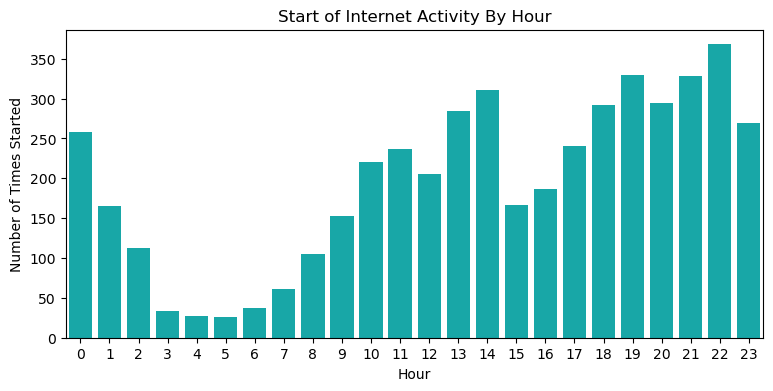

<Figure size 640x480 with 0 Axes>

In [157]:
## Graph above information
plt.figure(figsize=(9,4))
sns.barplot(x=internet_time.start_time, y=internet_time.name, color='c')
plt.xlabel('Hour')
plt.ylabel('Number of Times Started')
plt.title('Start of Internet Activity By Hour')
plt.show()
plt.clf()

### Question 2

In [158]:
## Get a table showing the ip for each user
ip = internet[['name', 'start_time', 'IP']]
ip.head()

,name,start_time,IP
0,user1,2022-05-10 02:59:32,10.55.14.222
1,user1,2022-05-10 18:53:27,10.55.2.253
2,user1,2022-05-10 21:20:44,10.55.2.253
3,user1,2022-05-11 00:37:42,10.55.2.253
4,user1,2022-05-11 02:59:38,10.55.2.253


In [159]:
## Get list of all users
users = internet.name.unique()
users

array(['user1', 'user2', 'user3', 'user4', 'user5', 'user6', 'user7',
       'user8', 'user9'], dtype=object)

In [160]:
## Create function that will be able to return how many times either IP or MAC changed depending on input
def monthly_change(username, column):
    user_change = internet[internet.name == username]
    mask = (user_change['start_time'] >= '2022-5-10') & (user_change['start_time'] <= '2022-6-10')
    user_change = user_change.loc[mask].reset_index()
    num_changed = 0
    for i in range(0, len(user_change[column])):
        yesterday= None
        if i >= 1:
            yesterday = user_change[column].loc[i - 1]
        else:
            yesterday = user_change[column].loc[0]
        if user_change[column].loc[i] != yesterday:
            num_changed += 1
        elif user_change[column].loc[i] == yesterday:
            None
        else:
            None
    return num_changed

In [161]:
## Show how many times the ip changed in a month for each user
for user in users:
    print(user + ': ' + str(monthly_change(user, 'IP')))

user1: 32
user2: 73
user3: 57
user4: 61
user5: 56
user6: 32
user7: 52
user8: 47
user9: 63


In [162]:
## Check if data is normally distributed
from scipy.stats import skew
list_of_ip_changes = []
for user in users:
    list_of_ip_changes.append(monthly_change(user, 'IP'))
skew(list_of_ip_changes, axis=0, bias=True)
## Normally distributed so can use mean

-0.36575407316384495

In [163]:
## Calculate the average ip changes across all users in a month
total_ip_changes = 0
for user in users:
    total_ip_changes += monthly_change(user, 'IP')
print('Avg IP Changes: ' + str(round(total_ip_changes / len(users))))

Avg IP Changes: 53


In [164]:
## Turn into dataframe
ip_changes_df = pd.DataFrame(data=list_of_ip_changes, index=users)
ip_changes_df.reset_index(level=0, inplace=True)
ip_changes_df.columns = ['user', 'ip_changes']

ip_changes_df.sort_values('ip_changes', ascending=False, inplace=True)

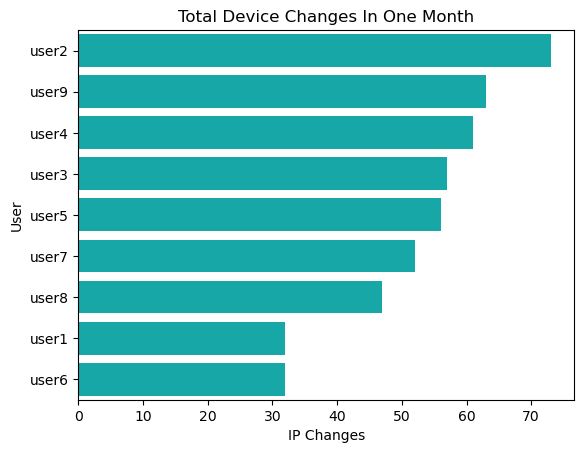

<Figure size 640x480 with 0 Axes>

In [165]:
## Visualize data above
sns.barplot(x=ip_changes_df.ip_changes, y=ip_changes_df.user, color='c')
plt.xlabel('IP Changes')
plt.ylabel('User')
plt.title('Total Device Changes In One Month')
plt.show()
plt.clf()

### Question 3

In [166]:
## Show how many times each user changed devices over 1 month
for user in users:
    print(user + ': ' + str(monthly_change(user, 'MAC')))

user1: 10
user2: 45
user3: 18
user4: 48
user5: 44
user6: 10
user7: 39
user8: 12
user9: 2


In [167]:
## Check to see if the data is normally distributed
list_of_mac_changes = []
for user in users:
    list_of_mac_changes.append(monthly_change(user, 'MAC'))
skew(list_of_mac_changes, axis=0, bias=True)
## Is normally distributed so can use mean

0.12161661531160989

In [168]:
## Calculate the average amount of times devices were changed between all users
total_device_changes = 0
for user in users:
    total_device_changes += monthly_change(user, 'MAC')
print('Avg Device Changes: ' + str(round(total_device_changes / len(users))))

Avg Device Changes: 25


In [169]:
## Turn into dataframe
changes_df = pd.DataFrame(data=list_of_mac_changes, index=users)
changes_df.reset_index(level=0, inplace=True)
changes_df.columns = ['user', 'changes']

changes_df.sort_values('changes', ascending=False, inplace=True)


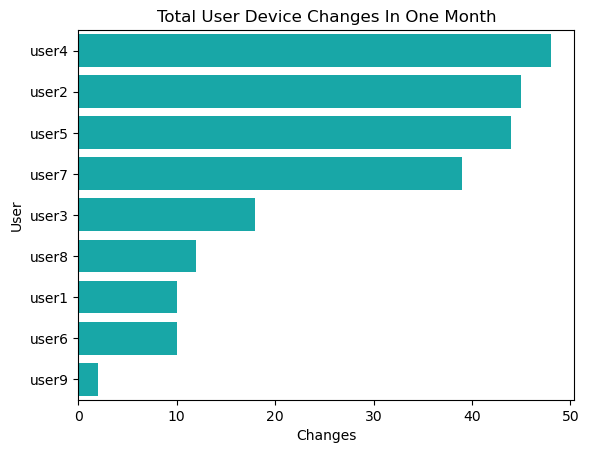

<Figure size 640x480 with 0 Axes>

In [170]:
## Visualize above data
sns.barplot(data=changes_df, y=changes_df.user, x=changes_df.changes, color='c')
plt.ylabel('User')
plt.xlabel('Changes')
plt.title('Total User Device Changes In One Month')
plt.show()
plt.clf()

### Question 4

In [171]:
## Number of users on each device
user_devices = internet[['MAC', 'name']].drop_duplicates()

user_devices_count = user_devices.groupby('MAC')\
    .count()\
    .reset_index()\
    .sort_values('name', ascending=False).head(10)
user_devices_count

,MAC,name
0,0C:F3:46:71:E2:27,2
20,C2:BB:83:2B:FF:5A,2
4,48:E7:DA:58:22:E9,2
28,E8:6F:38:A4:F8:2F,2
7,7C:10:C9:AD:6E:E6,2
18,B6:99:3E:1D:FB:19,2
10,90:32:4B:3B:10:DB,2
24,D8:9C:67:BA:DC:B9,1
21,C6:2C:1D:5E:86:70,1
22,C8:3D:DC:CF:16:C6,1


In [172]:
## Get List of devices with multiple users
devices = user_devices_count['MAC'][user_devices_count.name == 2].to_list()
print(devices)

['0C:F3:46:71:E2:27', 'C2:BB:83:2B:FF:5A', '48:E7:DA:58:22:E9', 'E8:6F:38:A4:F8:2F', '7C:10:C9:AD:6E:E6', 'B6:99:3E:1D:FB:19', '90:32:4B:3B:10:DB']


In [173]:
## Get a list of users who share the same device
shared_users = []
for id in devices:
    shared_users.append(user_devices['name'][user_devices['MAC'] == id].to_list())
print(shared_users)

[['user1', 'user6'], ['user5', 'user9'], ['user1', 'user6'], ['user5', 'user9'], ['user1', 'user6'], ['user1', 'user6'], ['user1', 'user6']]


In [174]:
## Clean duplicates
shared_users_clean = []
for lst in shared_users:
    if lst not in shared_users_clean:
        shared_users_clean.append(lst)
shared_users_clean

[['user1', 'user6'], ['user5', 'user9']]

## Conclusion

- what is the most frequent internet activity time of the day ?
    -  The most frequent internet activity time of the day begins at 10 pm.
        - Further analysis shows that the lowest internet activity time ranges from 2-8 am. A possible cause of this could be a majority of users in this dataset are normally asleep at those hours.
#
- how often the ip changes ?
    - IP addresses are changed on average 53 times a month, with the changes being as low as 32 and high as 73 between these 9 users.
#
- how often the device changes?
    - Devices are changed on average 25 times a month with it being as high as 48 changes by one user (user4), to as low as only 2 changes by a user (user9)
#
- Do different users use the same device?
    - User 1 shares devices with user 6, and user 5 shares with user 9.